<a href="https://colab.research.google.com/github/jaydeepchakraborty/NLP/blob/master/Regression/LinearRegressionWithPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive/')
DIR='/content/drive/MyDrive/Tutorial/Regression/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [68]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def getDataParam():
    data_param = {
        "data_fl": "data/Illness.csv",
        "train_test_split_idx":0.8,
        "batch_size": 5,
        "num_epochs": 100,
        "model_path": "model/linear_model.pt"
    }
    return data_param

In [24]:
def loadData(data_param):
  fl_nm = DIR + data_param["data_fl"]
  data = np.genfromtxt(fl_nm, delimiter=',')
  print("Entire Data Shape: "+str(data.shape))
  return data

In [25]:
def splitData(data_param, data):
  indices = np.random.permutation(data.shape[0])
  split_idx = int(data_param["train_test_split_idx"]*data.shape[0])
  train_idx, test_idx = indices[:split_idx], indices[split_idx:]
  train_data, test_data = data[train_idx,:], data[test_idx,:]
  print("Train Data Shape: "+str(train_data.shape))
  print("Test Data Shape: "+str(test_data.shape))
  return train_data, test_data

In [26]:
def prepareData(data):
  inputs, targets = data[:,:-1], data[:,-1]
  targets = np.reshape(targets, (targets.shape[0], 1))
  inputs = torch.from_numpy(inputs)
  targets = torch.from_numpy(targets)
  train_ds = TensorDataset(inputs, targets)

  return train_ds

In [79]:
def plotData(data):
  fig = plt.figure()
  axs = fig.subplots(1, 2)
  col = 0
  axs[0].scatter(data[:,col],data[:,-1])
  axs[0].set(xlabel="Col- "+str(col), ylabel='Illness')
  axs[0].set_title("Col-"+str(col)+" VS Illness")

  col = 1
  axs[1].scatter(data[:,col],data[:,-1])
  axs[1].set(xlabel="Col- "+str(col), ylabel='Illness') 
  axs[1].set_title("Col-"+str(col)+" VS Illness")

  plt.show()

In [28]:
class LinearRegressionModel(nn.Module):
    def __init__(self, in_size, out_size):
       super().__init__()
       self.linear = nn.Linear(in_features = in_size, out_features = out_size)

    def forward(self, X):
        pred = self.linear(X)
        return pred

In [29]:
def train(data_param, train_ds):

  dataiter = iter(train_ds)
  input_0, target_0 = next(dataiter)
  input_shape = input_0.size()[0]
  target_shape = target_0.size()[0]

  # Define model
  model = LinearRegressionModel(input_shape, target_shape)
  
  #Define the loss function
  loss_fun = F.mse_loss

  # Define SGD optimizer with learning rate 1e-5
  optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

  train_dl = DataLoader(train_ds, data_param["batch_size"], shuffle=True)

  # Repeat for given number of epochs
  for epoch in range(data_param["num_epochs"]):
      # Train with batches of data
      for xb,yb in train_dl:

          # 1. Generate predictions
          pred = model(xb.float())

          # 2. Calculate loss
          loss = loss_fun(pred.float(), yb.float())
          
          # 3. Compute gradients
          loss.backward()
          
          # 4. Update parameters using gradients
          optimizer.step()
          
          # 5. Reset the gradients to zero
          optimizer.zero_grad()
      
      # Print the progress
      if (epoch+1) % 10 == 0:
          print('Epoch [{}/{}], Loss: {:.10f}'.format(epoch+1, data_param["num_epochs"], loss.item()))

  return model

In [35]:
def save_model(model, data_param):
  torch.save(model.state_dict(), DIR+data_param["model_path"])

In [48]:
def load_model(data_param, test_ds):
  
  dataiter = iter(test_ds)
  input_0, target_0 = next(dataiter)
  input_shape = input_0.size()[0]
  target_shape = target_0.size()[0]
  model = LinearRegressionModel(input_shape, target_shape)
  model.load_state_dict(torch.load(DIR+data_param["model_path"]))
  model = model.float()
  model.eval()

  return model

In [62]:
def test(test_dl, lin_model_test):
  output = [] #blank numpy array
  for xb,yb in test_dl:
    pred = lin_model_test(xb.float())
    output.append([pred.data, yb.data])

  return np.asarray(output)

In [84]:
def plot_result(pred_op):
  pred_vals = pred_op[:,0]
  actual_vals = pred_op[:,1]
  plt.figure()
  plt.plot(pred_vals, 'r-.')
  plt.plot(actual_vals, 'b-.')

#################### Linear Regression with PyTorch START ####################
Entire Data Shape: (53, 3)
Train Data Shape: (42, 3)
Test Data Shape: (11, 3)
Epoch [10/100], Loss: 61.7422676086
Epoch [20/100], Loss: 179.9400024414
Epoch [30/100], Loss: 114.3090896606
Epoch [40/100], Loss: 15.5429000854
Epoch [50/100], Loss: 39.0652503967
Epoch [60/100], Loss: 51.1541938782
Epoch [70/100], Loss: 112.1704635620
Epoch [80/100], Loss: 29.8312530518
Epoch [90/100], Loss: 662.6726074219
Epoch [100/100], Loss: 94.4486541748
#################### Linear Regression with PyTorch FINISH ####################


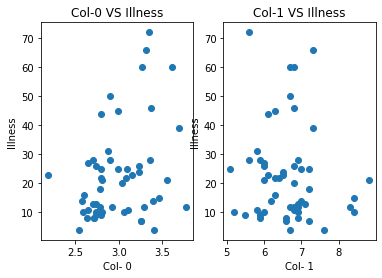

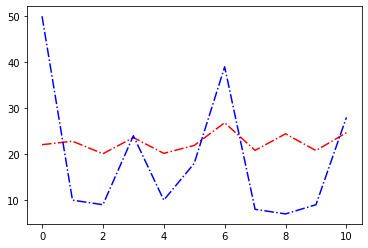

In [85]:
if __name__=="__main__":
  try:
    print("#################### Linear Regression with PyTorch START ####################")
    #loding basic parameter
    data_param = getDataParam()

    #loding the entire dataset
    data = loadData(data_param)

    #plotting the data to check linearity
    plotData(data)

    #splitting the entir data into training and testing data
    train_data, test_data = splitData(data_param, data)

    # plotData(train_data)
    
    #prepare the training data
    train_ds = prepareData(train_data)

    #training
    lin_model_train = train(data_param, train_ds)

    #saving the model
    save_model(lin_model_train, data_param)

    #prepare the testing data
    test_ds = prepareData(test_data)

    #load the model
    lin_model_test = load_model(data_param, test_ds)

    #testing
    pred_op = test(test_ds, lin_model_test)

    #plot output
    plot_result(pred_op)

  except Exception as exp:
        raise exp
  finally:
        print("#################### Linear Regression with PyTorch FINISH ####################")

**Resources**


1.   https://medium.com/analytics-vidhya/linear-regression-with-pytorch-147fed55f138

